# 学习目标

 了解文本数据分析的作用.
掌握常用的几种文本数据分析方法.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#设置显示风格
plt.style.use('fivethirtyeight')

In [7]:
data = pd.read_csv('./waimai_10k.csv')

In [8]:
data

,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！
...,...,...
11982,0,以前几乎天天吃，现在调料什么都不放，
11983,0,昨天订凉皮两份，什么调料都没有放，就放了点麻油，特别难吃，丢了一份，再也不想吃了
11984,0,"凉皮太辣,吃不下都"
11985,0,本来迟到了还自己点！！！


In [25]:
data.info

<bound method DataFrame.info of        label                                    review
0          1                              很快，好吃，味道足，量大
1          1                              没有送水没有送水没有送水
2          1                                  非常快，态度好。
3          1                           方便，快捷，味道可口，快递给力
4          1                              菜味道很棒！送餐很及时！
...      ...                                       ...
11982      0                        以前几乎天天吃，现在调料什么都不放，
11983      0  昨天订凉皮两份，什么调料都没有放，就放了点麻油，特别难吃，丢了一份，再也不想吃了
11984      0                                 凉皮太辣,吃不下都
11985      0                              本来迟到了还自己点！！！
11986      0         肉夹馍不错，羊肉泡馍酱肉包很一般。凉面没想象中好吃。送餐倒是很快。

[11987 rows x 2 columns]>

In [28]:
#选取训练集
train_data = data.sample(frac=0.8, random_state=0, axis=0)
#选取验证集
valid_data = data[~data.index.isin(train_data.index)]

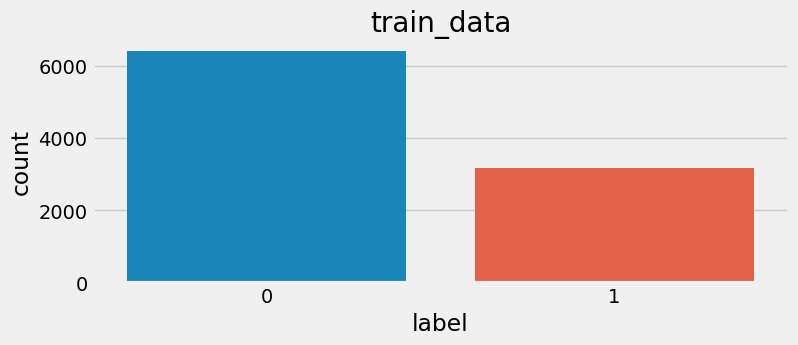

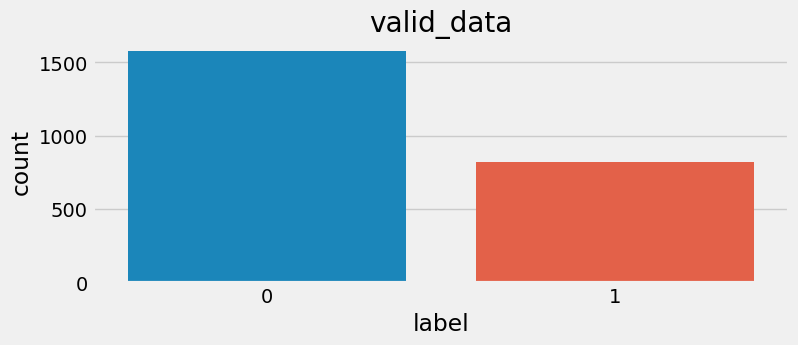

In [52]:
plt.figure(dpi=100, figsize=(8, 3))
sns.countplot(x = 'label' , data=train_data)
plt.title('train_data')
plt.show()

plt.figure(dpi=100, figsize=(8, 3))
sns.countplot(x='label', data=valid_data)
plt.title('valid_data')
plt.show()

In [30]:
#再保存一下：
# train_data.to_csv("train_data.csv",index=False)
# test_data.to_csv("test_data.csv",index=False)

# 获取训练集和验证集的句子长度分布

In [31]:
# 在训练数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
#第一个参数 function 以参数序列中的每一个元素调用 function 函数，返回包含每次 function 函数返回值的新列表
train_data['sentence_length'] = list(map(lambda x: len(x), train_data['review']))

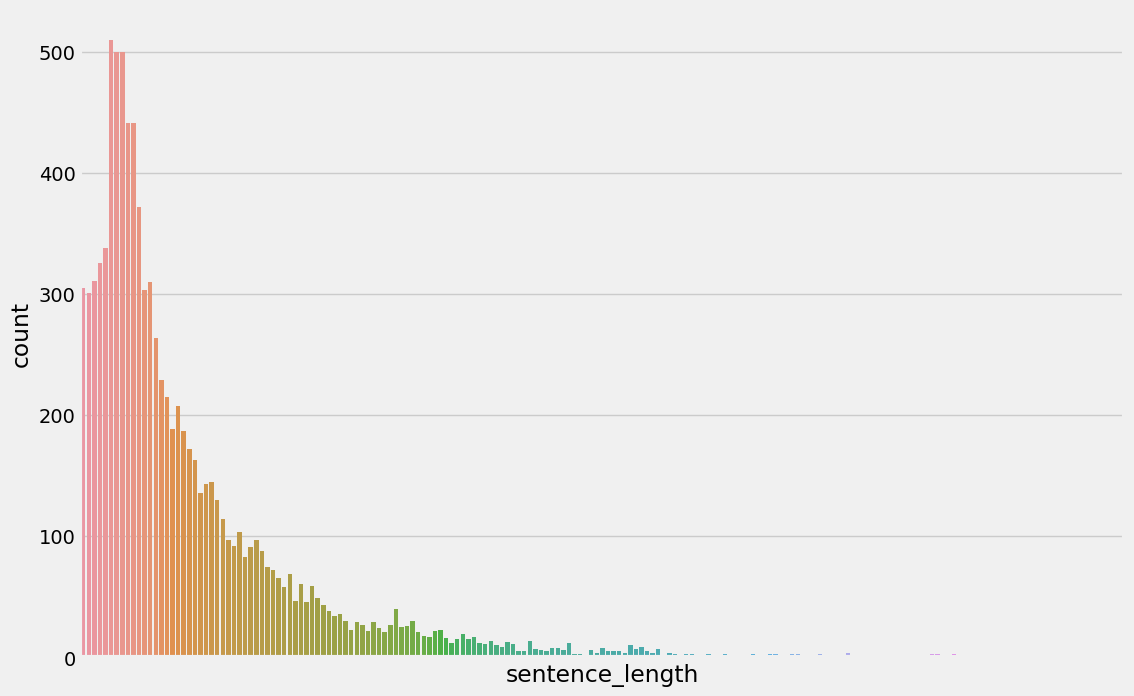

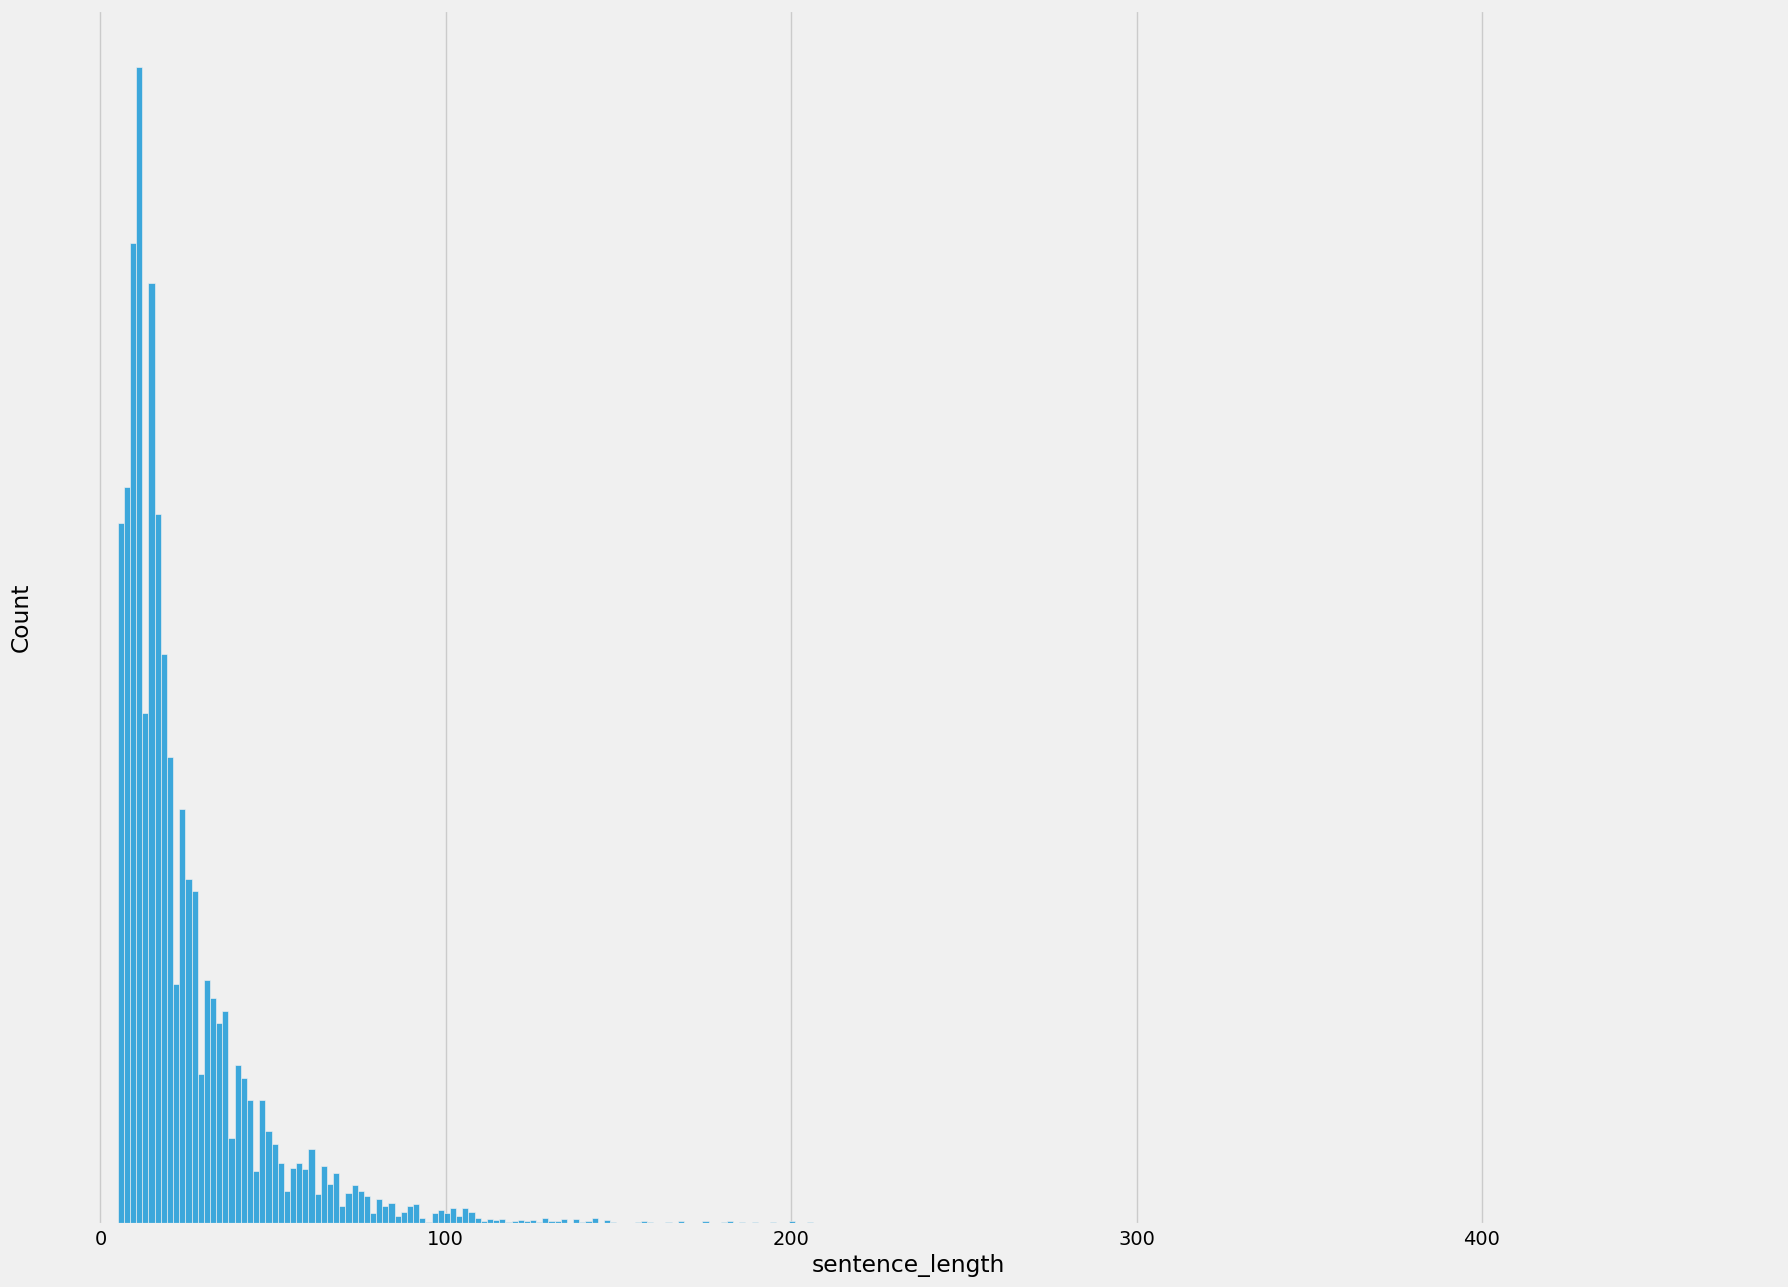

In [62]:
# 绘制句子长度列的数量分布图
plt.figure(dpi=100, figsize=(12, 8))
sns.countplot(x = 'sentence_length', data=train_data)

# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
plt.figure(dpi=100, figsize=(20,15))
sns.histplot(train_data['sentence_length'])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

In [63]:
# 在验证数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
valid_data["sentence_length"] = list(map(lambda x: len(x), valid_data["review"]))

C:\Users\HP\AppData\Local\Temp\ipykernel_4388\160414509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data["sentence_length"] = list(map(lambda x: len(x), valid_data["review"]))


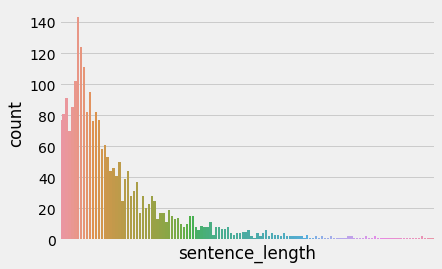

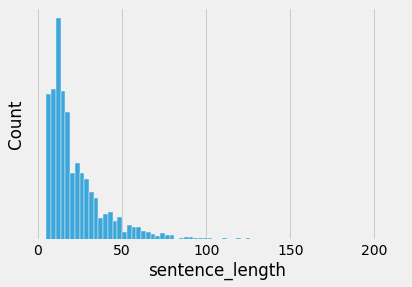

In [64]:


# 绘制句子长度列的数量分布图
sns.countplot(x = "sentence_length", data=valid_data)

# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
sns.histplot(valid_data["sentence_length"])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

# 获取训练集和验证集的正负样本长度散点分布

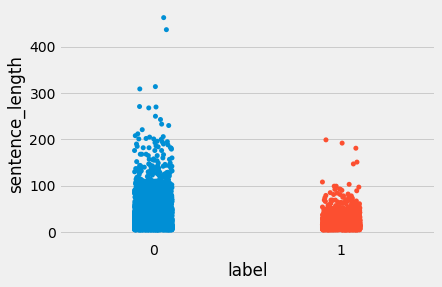

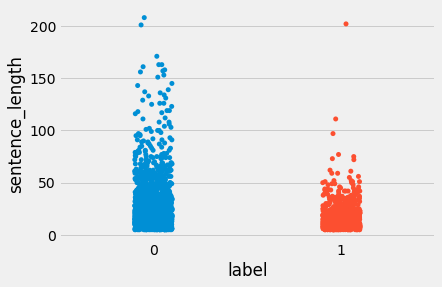

In [67]:
sns.stripplot(y='sentence_length', x='label', data=train_data)
plt.show()

sns.stripplot(y='sentence_length', x='label', data=valid_data)
plt.show()

# 获得训练集与验证集不同词汇总数统计

In [68]:
# 导入jieba用于分词
# 导入chain方法用于扁平化列表
import jieba
from itertools import chain

In [69]:
# 进行训练集的句子进行分词, 并统计出不同词汇的总数
train_vocab = set(chain(*map(lambda x: jieba.lcut(x), train_data['review'])))
print('训练集共包括不同词汇数为： ', len(train_vocab))

valid_vocab = set(chain(*map(lambda x: jieba.lcut(x), valid_data['review'])))
print('验证集共包含不同词汇数： ', len(valid_vocab))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 0.324 seconds.
Prefix dict has been built successfully.


训练集共包括不同词汇数为：  9832
验证集共包含不同词汇数：  4552


In [70]:
# 使用jieba中的词性标注功能
import jieba.posseg as pseg

In [83]:
def get_a_list(text):
    '''用于获取形容词列表'''
    #使用jieba的词性标注方法切分文本，获得具有词属性flag和词汇属性word的对象
    #从而判断flag是否为形容词，来返回对应的词汇
    r = []
    for g in pseg.lcut(text):
        if g.flag == 'a':
            r.append(g.word)
    return r

In [84]:
#导入绘制词云的包
from wordcloud import WordCloud

In [85]:
def get_word_cloud(keywords_list):
    # 实例化绘制词云的类, 其中参数font_path是字体路径, 为了能够显示中文
    # max_words指词云图像最多显示多少个词, background_color为背景颜色 
    wordcloud = WordCloud(font_path='./simhei.ttf', max_words=100, background_color='white')
    # 将传入的列表转化成词云生成器需要的字符串形式
    keywords_string = ' '.join(keywords_list)
    #生成词云
    wordcloud.generate(keywords_string)
    
    #绘制图像并显示
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [86]:
# 获得训练集上正样本
p_train_data = train_data[train_data['label']==1]['review']

In [91]:
# 对正样本的每个句子的形容词
train_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_train_data))

In [92]:
# 获得训练集上负样本
n_train_data = train_data[train_data['label']==0]['review']

In [93]:
# 获取负样本的每个句子的形容词
train_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_train_data))

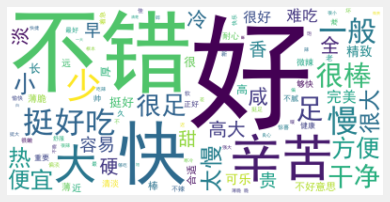

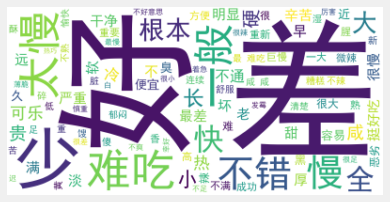

In [94]:
# 调用绘制词云函数
get_word_cloud(train_p_a_vocab)
get_word_cloud(train_n_a_vocab)

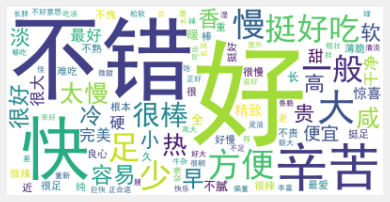

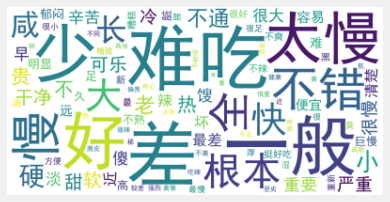

In [96]:
# 获得验证集上正样本
p_valid_data = valid_data[valid_data['label']==1]['review']

# 对正样本的每个句子的形容词
valid_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_valid_data))

# 获得验证集上负样本
n_valid_data = valid_data[valid_data["label"]==0]["review"]

# 获取负样本的每个句子的形容词
valid_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_valid_data))

# 调用绘制词云函数
get_word_cloud(valid_p_a_vocab)
get_word_cloud(valid_n_a_vocab)